# Decomposition Models

We can improve the accuracy of our predictions by breaking down the effect that the factors have on the data. The four factors, trends, seasonal, cyclic, and random can be extracted with the help of the decomposition models. The decomposition models are used to find these four factors in time series data. The model helps us identify patterns in the data and make accurate predictions.

There are basically two decomposition models.

1. Additive model is used when seasonal variations are relatively constant over time

2. Multiplicative model is used when seasonal variations increase or decrease over time

## Addition Models

Additive model can be used to understand the seasonal effects on the data when the variations are relatively constant. The time series data may be decomposed as follows:

 Time Series Data = (Seasonal) + (Trends) + (Random)

Before proceeding with the decomposition of the data, we need to define the seasonal span by setting the frequency.

For example, if the data is in terms of years then you can set the year-end frequency by dateoffset 'A'. Similarly, for quarter end you can use 'Q'.

Example: AirPassengers

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Load fresh data
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')
AirPassenger = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# Getting data corresponding to each month
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AP_reshaped = pd.DataFrame(AirPassenger.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337



The seasonal_decompose command helps to compute the trend, seasonal, and random values of AirPassengers data. The below python script shows the decomposition of AirPassengers data on yearly basis by using additive model.

In [4]:
# Importing libraries
import numpy as np
import pandas as pd

# Extracting the seasonal values
seasonal_data = np.round(seasonal_decompose(AirPassenger, model='additive').seasonal, 2)

# Getting output corresponding to each month
AP_season = pd.DataFrame(seasonal_data.to_numpy().reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1950,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1951,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1952,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1953,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1954,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1955,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1956,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1957,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62
1958,-24.75,-36.19,-2.24,-8.04,-4.51,35.4,63.83,62.82,16.52,-20.64,-53.59,-28.62


Figures below show the decomposition of data taken on an annual basis (Frequency='A') and a quarterly basis (Frequency='Q').

Both the figures depict an upward trend.

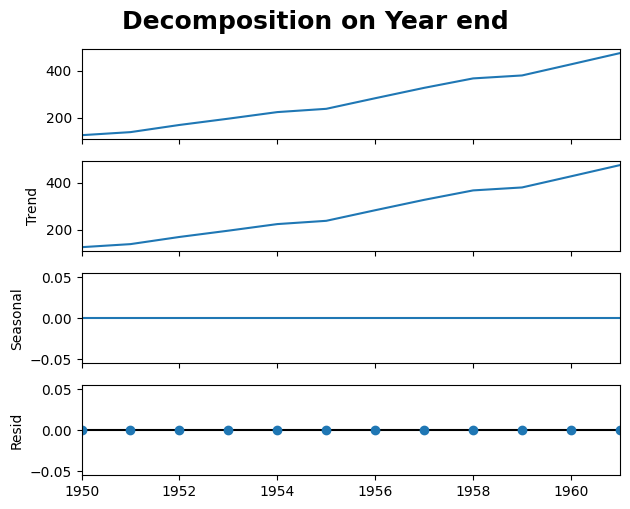

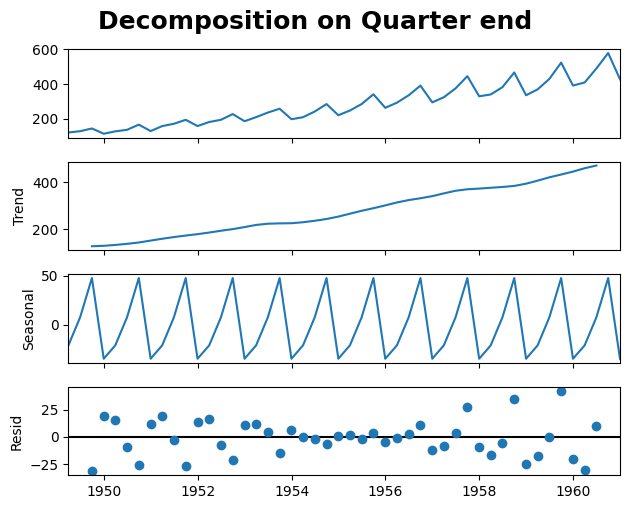

In [3]:
# Importing libraries
import matplotlib.pyplot as plt
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='additive').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

import matplotlib.pyplot as plt
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='additive').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()

The seasonality factor makes it difficult for us to identify whether the data is depicting an upward trend or a downward trend. Therefore, we need to remove the seasonality factor from our data. The process of removing the seasonality factor from the data is known as de-seasonalization and the resultant values are known as seasonally adjusted values. 

Let's calculate the seasonally adjusted values in the AirPassengers data using the below formula:

  Seasonally adjusted values = Time Series Data - (Seasonal) = (Trends) + (Random)

The number of passengers taking the international flight in December 1959 is 405 and the seasonal effect for December is -28.619949. So, the seasonally adjusted values can be computed as follows:

seasonally adjusted value = (405 - (-28.619949)) = 433.619949

Similarly, the seasonally adjusted value of the AirPassengers data for the yearly basis is computed below.

In [ ]:
# Deseasonalized data
AP_deseasonalized = AP_reshaped - AP_season
AP_deseasonalized

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,136.75,154.19,134.24,137.04,125.51,99.6,84.17,85.18,119.48,139.64,157.59,146.62
1950,139.75,162.19,143.24,143.04,129.51,113.6,106.17,107.18,141.48,153.64,167.59,168.62
1951,169.75,186.19,180.24,171.04,176.51,142.6,135.17,136.18,167.48,182.64,199.59,194.62
1952,195.75,216.19,195.24,189.04,187.51,182.6,166.17,179.18,192.48,211.64,225.59,222.62
1953,220.75,232.19,238.24,243.04,233.51,207.6,200.17,209.18,220.48,231.64,233.59,229.62
1954,228.75,224.19,237.24,235.04,238.51,228.6,238.17,230.18,242.48,249.64,256.59,257.62
1955,266.75,269.19,269.24,277.04,274.51,279.6,300.17,284.18,295.48,294.64,290.59,306.62
1956,308.75,313.19,319.24,321.04,322.51,338.6,349.17,342.18,338.48,326.64,324.59,334.62
1957,339.75,337.19,358.24,356.04,359.51,386.6,401.17,404.18,387.48,367.64,358.59,364.62
1958,364.75,354.19,364.24,356.04,367.51,399.6,427.17,442.18,387.48,379.64,363.59,365.62


Given figures show the AirPassengers data and the seasonally adjusted value of AirPassengers data.

These deseasonalized values will be used further in forecasting, which is explained later in this course.

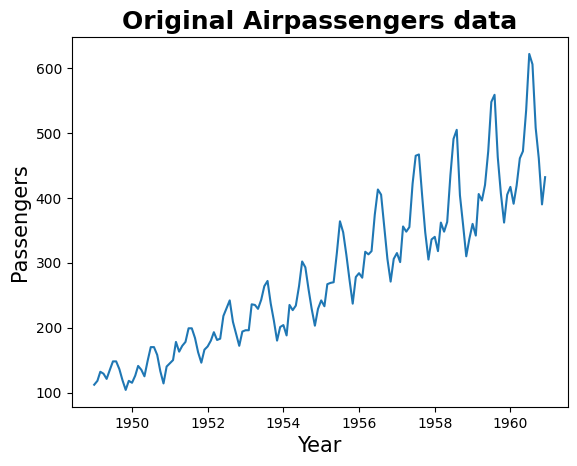

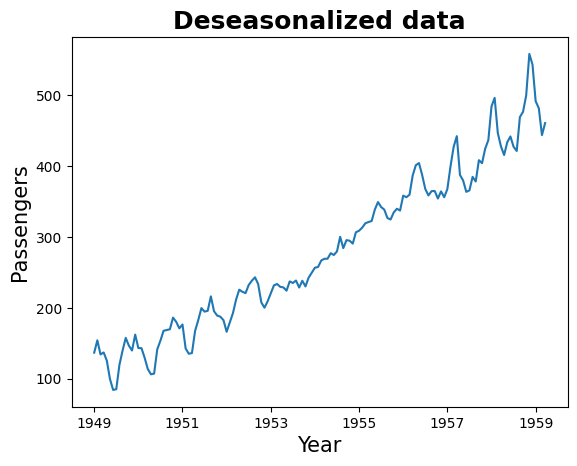

In [19]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Melting the data by forming a 1D data to proceed with visualization
plt.plot(AirPassenger)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Original Airpassengers data', weight='bold', fontsize=18)
plt.show()

# Melting the data by forming it to a 1D data to proceed with visualization
plt.plot(pd.melt(AP_deseasonalized.T).value)
plt.xticks(np.linspace(0, 140, 6), np.unique(pd.melt(AP_deseasonalized.T).variable)[::2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Deseasonalized data', weight='bold', fontsize=18)
plt.show() 

## Multiplicative Models

As discussed in additive model we need to compute the seasonally adjusted value for the yearly AirPassengers data.

It is useful when the seasonal variations change over a period of time.

Time Series Data = (Seasonal) * (Trends) * (Random)

In [20]:
# Importing libraries
import numpy as np
import pandas as pd
# Extracting the seasonal values
seasonal_data_mult = np.round(seasonal_decompose(AirPassenger, model='multiplicative').seasonal, 2)
# Getting output corresponding to each month
AP_season_mult = pd.DataFrame(seasonal_data_mult.values.reshape(-1, 12), 
                         columns=cols,                        # Month 
                         index=range(1949, 1961))             # Year
AP_season_mult


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1950,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1951,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1952,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1953,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1954,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1955,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1956,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1957,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9
1958,0.91,0.88,1.01,0.98,0.98,1.11,1.23,1.22,1.06,0.92,0.8,0.9


Below graph shows the yearly and the quarterly decomposition of the AirPassengers. The trend of the quarterly decomposed data has some variations.

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
# Decomposition of Airpassengers data on year end taking mean of monthly values
year_end = AirPassenger.resample('A').mean() # Here, DateOffset 'A' represents Year end
seasonal_decompose(year_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Year end', weight='bold', fontsize=18, y=1.05)
plt.show()

# Decomposition of Airpassengers data on quarter end taking mean of monthly values
quarter_end = AirPassenger.resample('Q').mean() # Here, DateOffset 'Q' represents Quarter end
seasonal_decompose(quarter_end, model='multiplicative').plot()
plt.suptitle('Decomposition on Quarter end', weight='bold', fontsize=18, y=1.05)
plt.show()